In [1]:
import os 
import numpy as np 
import seaborn as sns
sns.set_theme()

label_path = './dataset-split/labels/'
pedestrian_label = 3

experiment_yolo = './results/test/yolo/labels/'
experiment_lower = './results/test/loweryolo/labels/'
experiment_upper = './results/test/upperyolo/labels/'

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
test_files = os.listdir(experiment_yolo)
print(len(test_files))

748


In [4]:
#  Store predictions into All; All Pedestrians; All except Pedestrians; 
#  Only store if the prediction value is above 50% conf. 

def predictions(experiment_path, files): 
    all_predictions = []
    only_pedestrians = [] 
    not_pedestrians = [] 

    for fp in files: 
        with open(experiment_path + fp) as f: 
            line = f.readline()
            while line:
                l = [fp]
                [l.append(float(x)) for x in line.strip().split(' ')]

                if l[-1] > 0.5: 
                    all_predictions.append(l)  
                    if l[1] == 3: 
                        only_pedestrians.append(l)
                    else: 
                        not_pedestrians.append(l)
                line = f.readline()

    all_r = np.array(all_predictions)
    print(np.shape(np.unique(all_r[:,0])))

    ped_r = np.array(only_pedestrians)
    print(np.shape(np.unique(ped_r[:,0])))

    notp_r = np.array(not_pedestrians)
    print(np.shape(np.unique(notp_r[:,0])))
    return all_r, ped_r, notp_r

#  Store predictions into All; All Pedestrians; All except Pedestrians; 
#  Only store if the prediction value is above 50% conf. 

def label_ext(experiment_path, files): 
    all_predictions = []

    for fp in files: 
        with open(experiment_path + fp) as f: 
            line = f.readline()
            while line:
                l = [fp]
                [l.append(float(x)) for x in line.strip().split(' ')]

                all_predictions.append(l)  
                line = f.readline()
    
    all_r = np.array(all_predictions)
    print(np.shape(np.unique(all_r[:,0])))
    return all_r

In [5]:
## 
## Ta ut alla frames med enbart fotgängare 

experiment_path = label_path
all_files = os.listdir(experiment_path)


pedestrian_files = [] 
total_count = len(all_files) 
ctr = 0 

for fp in all_files: 
    ctr += 1 
    classes = []
    with open(label_path + fp) as f: 
        contents = f.read().splitlines()
        for line in contents: 
            classes.append(int(line[0])) 
    uniques = np.unique(classes)
    if 3 in uniques and len(uniques) == 1: 
        pedestrian_files.append(fp)

# print(only_pedestrians) 
print('all files:', len(all_files))
print('Files with only pedestrians:', len(pedestrian_files))

all files: 7481
Files with only pedestrians: 527


(748,)
(308,)
(540,)


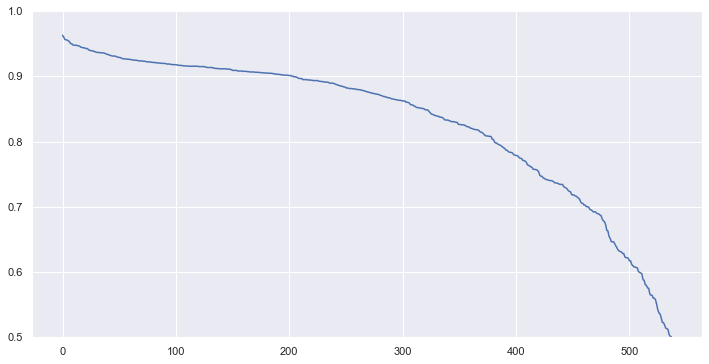

In [6]:
## Sort confidence predictions based on 

yolo_predictions, yolo_pedestrians, yolo_nonpedestrians = predictions(experiment_yolo, test_files)
conf_sorted = yolo_pedestrians[np.argsort(yolo_pedestrians[:,-1])][:, [0, -1]]
a = conf_sorted[:,1].astype('float32')[::-1]

fig, ax = plt.subplots(figsize=(12, 6))
plt.ylim([0.5, 1.0])
ax.plot(a)

(746,)
(301,)
(540,)


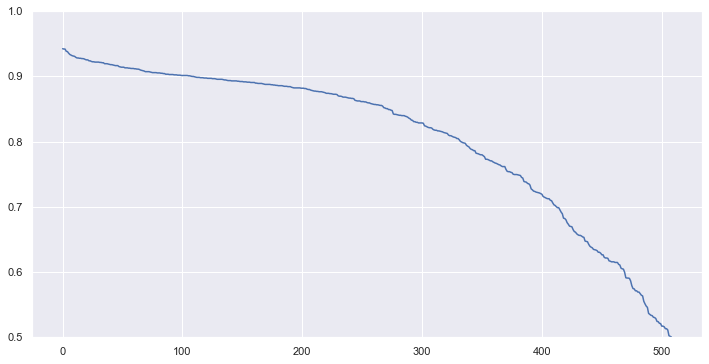

In [7]:
lower_predictions, lower_pedestrians, lower_nonpedestrians = predictions(experiment_lower, test_files)
conf_sorted_lower = lower_pedestrians[np.argsort(lower_pedestrians[:,-1])][:, [0, -1]]
b = conf_sorted_lower[:,1].astype('float32')[::-1]

fig, ax = plt.subplots(figsize=(12, 6))
plt.ylim([0.5, 1.0])
ax.plot(b)


(744,)
(302,)
(540,)


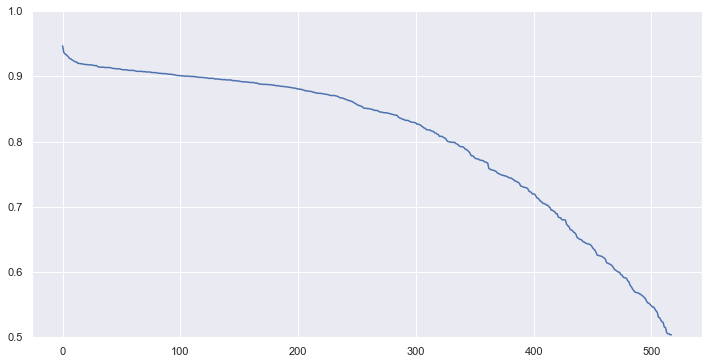

In [8]:
upper_predictions, upper_pedestrians, upper_nonpedestrians = predictions(experiment_upper, test_files)
conf_sorted_upper = upper_pedestrians[np.argsort(upper_pedestrians[:,-1])][:, [0, -1]]
c = conf_sorted_upper[:,1].astype('float32')[::-1]

fig, ax = plt.subplots(figsize=(12, 6))
plt.ylim([0.5, 1.0])
ax.plot(c)
plt.savefig('upper.png')

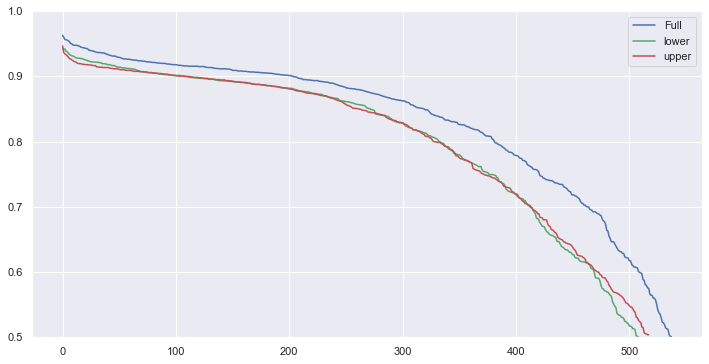

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.ylim([0.5, 1.0])
ax.plot(a, 'b')
ax.plot(b, 'g')
ax.plot(c, 'r')
ax.legend(['Full', 'lower', 'upper'])
plt.savefig('upper.png')

In [10]:
from collections import Counter
ca = Counter(test_files)
cb = Counter(pedestrian_files)

result_a = sorted((ca - cb).elements())
result_b = sorted((cb - ca).elements())
files_excl = result_a
print("Exclusions in main: ", len(result_a), len(result_b))

Exclusions in main:  537 316


In [13]:
testing_path = './dataset-split/testing/labels/'
test_files = os.listdir(testing_path)
labels = label_ext(testing_path, test_files)

(748,)


In [14]:
len(os.listdir(testing_path))

748

In [15]:
unique_test_files = np.unique(labels[:,0])
res = []

for utf in unique_test_files: 
    
    yy = np.array(yolo_predictions[yolo_predictions[:,0]==utf,:])[:,1:].astype('float32')
    ly = np.array(lower_predictions[lower_predictions[:,0]==utf,:])[:,1:].astype('float32')
    uy = np.array(upper_predictions[upper_predictions[:,0]==utf,:])[:,1:].astype('float32')

    ym = yy[yy[:,0]==3,-1]
    lm = ly[ly[:,0]==3,-1]
    um = uy[uy[:,0]==3,-1]
    
    res.append([0 if ym.size==0 else ym.mean(), 0 if lm.size==0 else lm.mean(), 0 if um.size==0 else um.mean()])

In [16]:
rr = np.array(res)
empty_indices = ~np.all(rr == 0, axis=1)
rr = rr[empty_indices]
sort_array = np.argsort(rr[:,0])
rs = rr[sort_array,:]


file_subset = unique_test_files[empty_indices]
file_subset_sorted = file_subset[sort_array]

In [225]:
from shutil import copyfile
# copyfile(src, dst)

nn = np.array(res)
ff = np.array(unique_test_files)[~np.all(nn == 0, axis=1)]
p = 'D:/Data/KITTI/split/testing/images/' 
l = 'D:/Data/KITTI/split/testing/labels/' 

if not os.path.isdir('./subset/'):
    os.mkdir('./subset')
    os.mkdir('./subset/images')
    os.mkdir('./subset/labels')


for f in ff: 
    fn = f.split('.')[0] + '.png'
    copyfile(p + fn, './subset/images/' + fn)
    copyfile(l + f, './subset/labels/' + f)

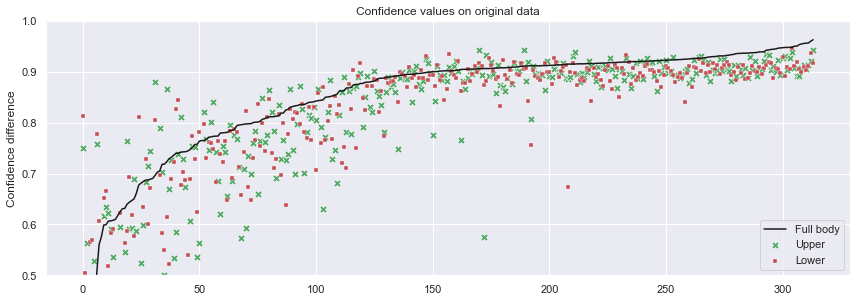

In [25]:
fig, ax = plt.subplots(figsize=(12, 4.3))
plt.ylim([0.5, 1.0])
sns.lineplot(data=rs[:,0], color='k')
sns.scatterplot(data=rs[:,1], color='g', marker='X',s=55)
sns.scatterplot(data=rs[:,2], color='r', marker='s', s=20)
#sns.scatterplot(x=nxr, y=negatives, color='r',marker='s')

ax.legend(['Full body', 'Upper', 'Lower'],loc='lower right')
plt.ylabel('Confidence difference')
plt.title('Confidence values on original data')
plt.tight_layout()
plt.savefig('./plots/initial_results.pdf')

In [21]:
both = np.array(np.logical_and(rr[:,1] > rr[:,0], rr[:,2] > rr[:,0]))
upper = np.array(rr[:,2] > rr[:,0])
lower = np.array(rr[:,1] > rr[:,0])

both.sum(), lower.sum(), upper.sum(), len(rr)

(25, 67, 53, 314)

In [22]:
both.sum(), lower.sum(), upper.sum(), len(rr)

(25, 67, 53, 314)

In [25]:
ra = np.array(res)
pt_files = unique_test_files[~np.all(ra == 0, axis=1)]
pt_files[both]


array(['000058.txt', '000063.txt', '000087.txt', '000147.txt',
       '000200.txt', '000277.txt', '000292.txt', '000341.txt',
       '000464.txt', '000490.txt', '000496.txt', '000509.txt',
       '000598.txt', '000646.txt', '000827.txt', '001211.txt',
       '001256.txt', '001423.txt', '001467.txt', '001777.txt',
       '001817.txt', '002334.txt', '002485.txt', '002689.txt',
       '002881.txt'], dtype='<U21')

In [20]:
np.mean(rs,axis=0)

array([0.84375909, 0.80119954, 0.80302098])

In [27]:
sort_array.shape

(314,)

In [33]:
pt_sorted = pt_files[sort_array]
pt_subset = pt_sorted[::10]

In [35]:
pt_subset

array(['000147.txt', '000292.txt', '000330.txt', '000310.txt',
       '000149.txt', '000663.txt', '000015.txt', '000436.txt',
       '001467.txt', '002616.txt', '000048.txt', '000336.txt',
       '000329.txt', '001558.txt', '001256.txt', '002605.txt',
       '001228.txt', '000827.txt', '002554.txt', '001994.txt',
       '002860.txt', '000058.txt', '002058.txt', '001272.txt',
       '001441.txt', '002857.txt', '002507.txt', '002402.txt',
       '002651.txt', '001519.txt', '001208.txt', '001394.txt'],
      dtype='<U21')

In [36]:
from shutil import copyfile
# copyfile(src, dst)

nn = np.array(res)
ff = np.array(unique_test_files)[~np.all(nn == 0, axis=1)]
p = 'D:/Data/KITTI/split/testing/images/' 
l = 'D:/Data/KITTI/split/testing/labels/' 

if not os.path.isdir('./sub35/'):
    os.mkdir('./sub35')
    os.mkdir('./sub35/images')
    os.mkdir('./sub35/labels')


for f in pt_subset: 
    fn = f.split('.')[0] + '.png'
    copyfile(p + fn, './sub35/images/' + fn)
    copyfile(l + f, './sub35/labels/' + f)

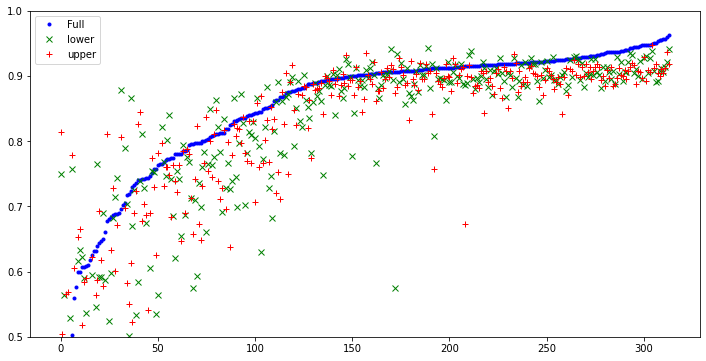

In [19]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.ylim([0.5, 1.0])
ax.plot(rs[:,0], 'b.')
ax.plot(rs[:,1], 'gx')
ax.plot(rs[:,2], 'r+')
ax.legend(['Full', 'lower', 'upper'])
# plt.savefig('data_scatter-regular.png')




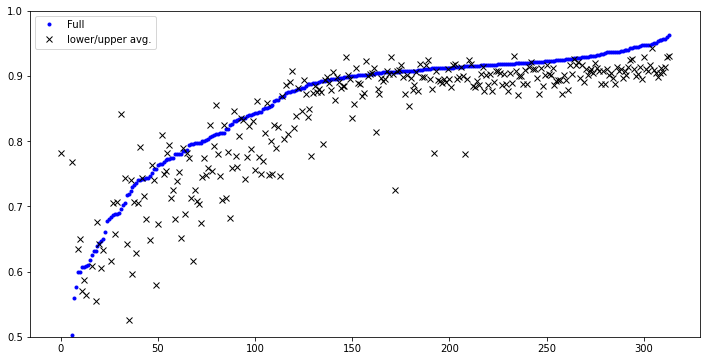

In [23]:
lower_upper_avg = (rs[:,1] + rs[:,2])/2

fig, ax = plt.subplots(figsize=(12, 6))
plt.ylim([0.5, 1.0])
ax.plot(rs[:,0], 'b.')
ax.plot(lower_upper_avg, 'kx')
ax.legend(['Full', 'lower/upper avg.'])
plt.savefig('regular-vs-upperlowerAverage.png')


In [24]:
yolo_regular = rs[:,0]
best_outliers = lower_upper_avg - yolo_regular

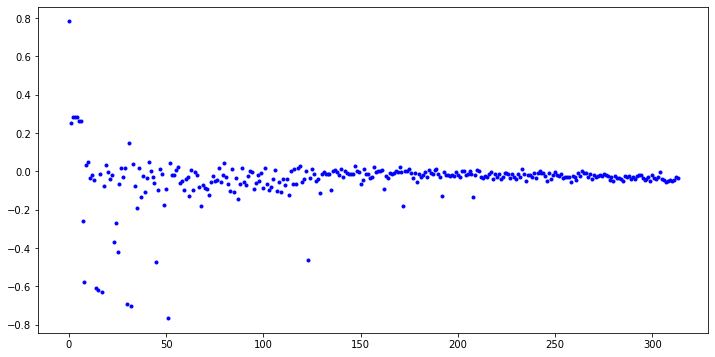

In [39]:
fig, ax = plt.subplots(figsize=(12, 6))
#plt.ylim([0.5, 1.0])
ax.plot(best_outliers, 'b.')
plt.savefig('Confidence-diff.png')


In [27]:
sort_array

array([ 35, 137,  62, 119, 110, 113,  50,  61, 127,  20,  70,   6,  79,
       122,  58,  27,  31, 167,  74, 134,  83, 108,  37,   2,  90,  14,
       287, 269,  77,  76,  75,  13, 140, 307, 115, 112,  25,  43, 206,
        34,  36,  55, 246, 162, 164,   7,  60, 125,  28,  93, 145,  21,
        65, 106, 278, 123,  98, 136,  51,  26,   4, 256, 267, 147,  33,
       217,  18,  52, 158, 222, 109, 128, 250,  10, 141, 103,  84,   8,
        99, 118, 207, 114, 105,  30, 116, 133,  64, 305, 139,  96, 283,
        42,  89,  16, 198, 234,  32, 138,  67, 211,   9, 184,  73,  95,
        91, 131, 264, 249,  46, 101,  85, 129,  63, 227, 240,  56, 190,
       274,  88, 124,  82,   3, 152, 100,  44, 142, 209,  45,  41, 155,
       215, 235, 285, 151, 241,  66, 290, 229,  72,  86, 188, 295, 262,
       169, 143, 297,  17, 225, 117, 132, 282, 165, 266,  22, 284, 260,
       289, 291, 258, 194, 185,  92,  57,  40,  97, 179, 161,  23, 253,
       271, 160, 236,  78, 173, 221, 309, 312,  59, 233,   1, 28

In [40]:
file_subset_sorted[0:15], best_outliers[0:15]

(array(['000147.txt', '000553.txt', '000273.txt', '000471.txt',
        '000441.txt', '000451.txt', '000200.txt', '000265.txt',
        '000499.txt', '000087.txt', '000292.txt', '000035.txt',
        '000317.txt', '000486.txt', '000254.txt'], dtype='<U21'),
 array([ 0.78173849,  0.25195301,  0.28173825,  0.28295901,  0.28442401,
         0.26440451,  0.26513597, -0.25708053, -0.57568401,  0.0356445 ,
         0.05004898, -0.0362545 , -0.01977578, -0.04467806, -0.60986298]))